In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Stage 1: Dataset extraction:

1) Product name: Airdopes

2) Scrapping method: Beautiful soup

3) Number of reviews extracted: 830

4) Website used: Amazon

Stage 2: Dataset Conversion
1) Dataset is converted into CSV file

Stage 3: Reading the dataset

In [6]:
df = pd.read_csv('C:\\Users\\nilka\\OneDrive\\Desktop\\excelr\\project 2\\boat_airdopes vishal.csv')
df.head()

,product,date,title,rating,body
0,Amazon.in:Customer reviews: boAt Airdopes 121v...,Reviewed in India on 29 October 2020,Edit: Stopped functioning in 3 months.,1,Sound Quality is Impressive. Nothing to compla...
1,Amazon.in:Customer reviews: boAt Airdopes 121v...,Reviewed in India on 19 October 2020,Charging case cap loose.,1,Though I got the product at discounted price b...
2,Amazon.in:Customer reviews: boAt Airdopes 121v...,Reviewed in India on 22 October 2020,Terrific product for budget !!!👍,4,"Don't hear what haters say, still best2 months..."
3,Amazon.in:Customer reviews: boAt Airdopes 121v...,Reviewed in India on 5 November 2020,Not To Go!!!!,1,Honestly this product is not Good. Return & Re...
4,Amazon.in:Customer reviews: boAt Airdopes 121v...,Reviewed in India on 14 December 2020,"""Left bud stopped working with 10 days""",1,"Nice bluetooth earphones at this range ""but"" A..."


Stage 4: Review text extraction from body column

In [77]:
review_text = []
for i in range(830):
    review_text.append(df.body[i])


In [78]:
review_text

['Sound Quality is Impressive. Nothing to complain about.The carrying case can charge the earbuds upto  3 times to a full chargeI use a single earbud at a time, because I mostly use it for phone conversations.Perfect fit inside a helmet while riding a bike.But i do enjoy the stereo quality at times.Excellent price for triple nine.Better than expected.Finally a functional product that will use.Edit: Right Earbud stopped functioning after 2 months. Now left earbud also stopped functioning after 3 months.Will edit review with warranty feedback.',
 'Though I got the product at discounted price but quality is compromised. The cap of Charging case was very loose.',
 "Don't hear what haters say, still best2 months usage  review Product is awesome ,ProsTotally premium look for budget 999/-Fit to ears if smaller rubbers fittedCase is very small and good fit for budsBuds are light weightBass is 8/10Sound  9/10Sound effect 7/10Mic 7/10Battery 6.5/10ConsThe Case ,charge indicator glass was broken 

Stage 5: Dataset details

In [179]:
df.shape

(830, 5)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  830 non-null    object
 1   date     830 non-null    object
 2   title    830 non-null    object
 3   rating   830 non-null    int64 
 4   body     830 non-null    object
dtypes: int64(1), object(4)
memory usage: 32.5+ KB


Stage 6: Checking for duplication

In [181]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
825    False
826    False
827    False
828    False
829    False
Length: 830, dtype: bool

In [182]:
df.duplicated().sum()

0

In [183]:
df['product'].duplicated().sum()

829

Stage 7: Removal of unnecessary columns

+ Since the PRODUCT NAME is repeated in all rows and it doesnot contribute 
  towards the sentiment analysis, we have removed it from the data frame
  
+ Removal of date column

In [194]:
df = df.drop(labels=['product'],axis = 1)
df.head()

,date,title,rating,body
0,Reviewed in India on 29 October 2020,Edit: Stopped functioning in 3 months.,1,Sound Quality is Impressive. Nothing to compla...
1,Reviewed in India on 19 October 2020,Charging case cap loose.,1,Though I got the product at discounted price b...
2,Reviewed in India on 22 October 2020,Terrific product for budget !!!👍,4,"Don't hear what haters say, still best2 months..."
3,Reviewed in India on 5 November 2020,Not To Go!!!!,1,Honestly this product is not Good. Return & Re...
4,Reviewed in India on 14 December 2020,"""Left bud stopped working with 10 days""",1,"Nice bluetooth earphones at this range ""but"" A..."


In [195]:
df = df.drop(labels=['date'],axis = 1)
df.head()

,title,rating,body
0,Edit: Stopped functioning in 3 months.,1,Sound Quality is Impressive. Nothing to compla...
1,Charging case cap loose.,1,Though I got the product at discounted price b...
2,Terrific product for budget !!!👍,4,"Don't hear what haters say, still best2 months..."
3,Not To Go!!!!,1,Honestly this product is not Good. Return & Re...
4,"""Left bud stopped working with 10 days""",1,"Nice bluetooth earphones at this range ""but"" A..."


Stage 8: Preprocessing of Review COLUMN text

- Conversion of uppercase letters into lowercase
- Tokenization: 
        Sentence tokenization
        Word tokenization
- Punctuation Removal using regular expression
- stop word removal
- Rating Analysis
- Data visualization for ratings


- Conversion of uppercase letters into lowercase

In [87]:
clean_text_1 = []

def to_lower_case(data):
    for words in review_text:
        clean_text_1.append(str.lower(words))

In [88]:
to_lower_case(review_text)

In [89]:
clean_text_1

['sound quality is impressive. nothing to complain about.the carrying case can charge the earbuds upto  3 times to a full chargei use a single earbud at a time, because i mostly use it for phone conversations.perfect fit inside a helmet while riding a bike.but i do enjoy the stereo quality at times.excellent price for triple nine.better than expected.finally a functional product that will use.edit: right earbud stopped functioning after 2 months. now left earbud also stopped functioning after 3 months.will edit review with warranty feedback.',
 'though i got the product at discounted price but quality is compromised. the cap of charging case was very loose.',
 "don't hear what haters say, still best2 months usage  review product is awesome ,prostotally premium look for budget 999/-fit to ears if smaller rubbers fittedcase is very small and good fit for budsbuds are light weightbass is 8/10sound  9/10sound effect 7/10mic 7/10battery 6.5/10consthe case ,charge indicator glass was broken 

In [ ]:
 - Tokenization: 
        Sentence tokenization
        Word tokenization

In [15]:
from nltk.tokenize import sent_tokenize,word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nilka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentence tokenization

In [91]:
sent_tok = []
for sent in clean_text_1:
    sent = sent_tokenize(sent)
    sent_tok.append(sent)

In [92]:
sent_tok

[['sound quality is impressive.',
  'nothing to complain about.the carrying case can charge the earbuds upto  3 times to a full chargei use a single earbud at a time, because i mostly use it for phone conversations.perfect fit inside a helmet while riding a bike.but i do enjoy the stereo quality at times.excellent price for triple nine.better than expected.finally a functional product that will use.edit: right earbud stopped functioning after 2 months.',
  'now left earbud also stopped functioning after 3 months.will edit review with warranty feedback.'],
 ['though i got the product at discounted price but quality is compromised.',
  'the cap of charging case was very loose.'],
 ["don't hear what haters say, still best2 months usage  review product is awesome ,prostotally premium look for budget 999/-fit to ears if smaller rubbers fittedcase is very small and good fit for budsbuds are light weightbass is 8/10sound  9/10sound effect 7/10mic 7/10battery 6.5/10consthe case ,charge indicat

### Word Tokenisation

In [93]:
clean_text_2 = [word_tokenize(i) for i in clean_text_1]

In [94]:
clean_text_2

[['sound',
  'quality',
  'is',
  'impressive',
  '.',
  'nothing',
  'to',
  'complain',
  'about.the',
  'carrying',
  'case',
  'can',
  'charge',
  'the',
  'earbuds',
  'upto',
  '3',
  'times',
  'to',
  'a',
  'full',
  'chargei',
  'use',
  'a',
  'single',
  'earbud',
  'at',
  'a',
  'time',
  ',',
  'because',
  'i',
  'mostly',
  'use',
  'it',
  'for',
  'phone',
  'conversations.perfect',
  'fit',
  'inside',
  'a',
  'helmet',
  'while',
  'riding',
  'a',
  'bike.but',
  'i',
  'do',
  'enjoy',
  'the',
  'stereo',
  'quality',
  'at',
  'times.excellent',
  'price',
  'for',
  'triple',
  'nine.better',
  'than',
  'expected.finally',
  'a',
  'functional',
  'product',
  'that',
  'will',
  'use.edit',
  ':',
  'right',
  'earbud',
  'stopped',
  'functioning',
  'after',
  '2',
  'months',
  '.',
  'now',
  'left',
  'earbud',
  'also',
  'stopped',
  'functioning',
  'after',
  '3',
  'months.will',
  'edit',
  'review',
  'with',
  'warranty',
  'feedback',
  '.'],

- Punctuation Removal using regular expression

In [21]:
import re

In [155]:
clean_text_3 =[]

for words in clean_text_2:
    clean=[]
    for w in words :
        res = re.sub(r'[^\w\s]' ,"",w)
        if res !="":
            clean.append(res)
    clean_text_3.append(clean)

In [156]:
clean_text_3

[['sound',
  'quality',
  'is',
  'impressive',
  'nothing',
  'to',
  'complain',
  'aboutthe',
  'carrying',
  'case',
  'can',
  'charge',
  'the',
  'earbuds',
  'upto',
  '3',
  'times',
  'to',
  'a',
  'full',
  'chargei',
  'use',
  'a',
  'single',
  'earbud',
  'at',
  'a',
  'time',
  'because',
  'i',
  'mostly',
  'use',
  'it',
  'for',
  'phone',
  'conversationsperfect',
  'fit',
  'inside',
  'a',
  'helmet',
  'while',
  'riding',
  'a',
  'bikebut',
  'i',
  'do',
  'enjoy',
  'the',
  'stereo',
  'quality',
  'at',
  'timesexcellent',
  'price',
  'for',
  'triple',
  'ninebetter',
  'than',
  'expectedfinally',
  'a',
  'functional',
  'product',
  'that',
  'will',
  'useedit',
  'right',
  'earbud',
  'stopped',
  'functioning',
  'after',
  '2',
  'months',
  'now',
  'left',
  'earbud',
  'also',
  'stopped',
  'functioning',
  'after',
  '3',
  'monthswill',
  'edit',
  'review',
  'with',
  'warranty',
  'feedback'],
 ['though',
  'i',
  'got',
  'the',
  'pr

- stop word removal

In [143]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nilka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [157]:
clean_text_4=[]

for words in clean_text_3:
    w=[]
    for word in words:
        if not word in stopwords.words('english'):
            w.append(word)
    clean_text_4.append(w)

In [158]:
clean_text_4

[['sound',
  'quality',
  'impressive',
  'nothing',
  'complain',
  'aboutthe',
  'carrying',
  'case',
  'charge',
  'earbuds',
  'upto',
  '3',
  'times',
  'full',
  'chargei',
  'use',
  'single',
  'earbud',
  'time',
  'mostly',
  'use',
  'phone',
  'conversationsperfect',
  'fit',
  'inside',
  'helmet',
  'riding',
  'bikebut',
  'enjoy',
  'stereo',
  'quality',
  'timesexcellent',
  'price',
  'triple',
  'ninebetter',
  'expectedfinally',
  'functional',
  'product',
  'useedit',
  'right',
  'earbud',
  'stopped',
  'functioning',
  '2',
  'months',
  'left',
  'earbud',
  'also',
  'stopped',
  'functioning',
  '3',
  'monthswill',
  'edit',
  'review',
  'warranty',
  'feedback'],
 ['though',
  'got',
  'product',
  'discounted',
  'price',
  'quality',
  'compromised',
  'cap',
  'charging',
  'case',
  'loose'],
 ['nt',
  'hear',
  'haters',
  'say',
  'still',
  'best2',
  'months',
  'usage',
  'review',
  'product',
  'awesome',
  'prostotally',
  'premium',
  'loo

- Rating Analysis

In [11]:
rating = df['rating']

In [13]:
rating.head()

0    1.0
1    1.0
2    4.0
3    1.0
4    1.0
Name: rating, dtype: float64

In [15]:
rating.value_counts()

1.0    297
5.0    152
3.0    138
4.0    135
2.0    108
Name: rating, dtype: int64

- Data visualization for ratings

<AxesSubplot:xlabel='rating', ylabel='count'>

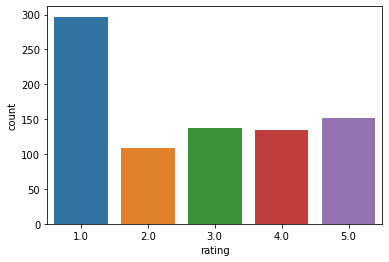

In [19]:
sns.countplot(data = df, x = 'rating')

<Figure size 720x504 with 0 Axes>

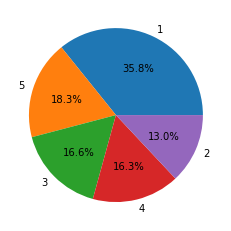

In [196]:
import matplotlib.pyplot as plt
Ratings = [0,1,2,3,4,5]
fig = plt.figure(figsize =(10, 7))
plt.show()
df1 = pd.DataFrame(df['rating'].value_counts().reset_index())

plt.pie(data=df1,x='rating',labels='index', autopct='%.1f%%')
# show plot
plt.show()

Stage 9: Preprocessing of Review TITLES text

In [7]:
Title_text = []
for i in range(830):
    Title_text.append(df.title[i])


In [8]:
Title_text

['Edit: Stopped functioning in 3 months.',
 'Charging case cap loose.',
 'Terrific product for budget !!!👍',
 'Not To Go!!!!',
 '"Left bud stopped working with 10 days"',
 'घटिया प्रोडक्ट',
 'Edit after 10days of use - not genuine product',
 'Bang for your buck!',
 'Ok',
 'Value for money!!',
 'Value for money',
 'Value for money',
 'Fake product of boat',
 'Value of money',
 'Worst battery backup',
 'Good at this price point',
 'Improve song quality',
 'Not useful as a calling device. Only a listening device.',
 'Bluethoot connectivity is not proper working with this product.',
 'Heat issue wich is very dangours',
 'nice sound and back-up....lacks the design and fit',
 'Consider the price and Go for it.',
 'My personal experience',
 'Connectivity issues in the first pair; left earbud button not working properly in the replacement.',
 'Highy Recommended',
 "Don't buy these earpieces!",
 'Wonderful value of money',
 'My Expereince was not good with this product',
 'Very nice,charming,st

### Convert to lower text

In [11]:
Title_clean_text_1 = []

def to_lower_case(data):
    for words in Title_text:
        Title_clean_text_1.append(str.lower(words))

In [12]:
to_lower_case(Title_text)

In [13]:
Title_clean_text_1

['edit: stopped functioning in 3 months.',
 'charging case cap loose.',
 'terrific product for budget !!!👍',
 'not to go!!!!',
 '"left bud stopped working with 10 days"',
 'घटिया प्रोडक्ट',
 'edit after 10days of use - not genuine product',
 'bang for your buck!',
 'ok',
 'value for money!!',
 'value for money',
 'value for money',
 'fake product of boat',
 'value of money',
 'worst battery backup',
 'good at this price point',
 'improve song quality',
 'not useful as a calling device. only a listening device.',
 'bluethoot connectivity is not proper working with this product.',
 'heat issue wich is very dangours',
 'nice sound and back-up....lacks the design and fit',
 'consider the price and go for it.',
 'my personal experience',
 'connectivity issues in the first pair; left earbud button not working properly in the replacement.',
 'highy recommended',
 "don't buy these earpieces!",
 'wonderful value of money',
 'my expereince was not good with this product',
 'very nice,charming,st

## Tokenization

In [16]:
sent_tok = []
for sent in Title_clean_text_1:
    sent = sent_tokenize(sent)
    sent_tok.append(sent)

In [17]:
sent_tok

[['edit: stopped functioning in 3 months.'],
 ['charging case cap loose.'],
 ['terrific product for budget !!', '!👍'],
 ['not to go!!!', '!'],
 ['"left bud stopped working with 10 days"'],
 ['घटिया प्रोडक्ट'],
 ['edit after 10days of use - not genuine product'],
 ['bang for your buck!'],
 ['ok'],
 ['value for money!', '!'],
 ['value for money'],
 ['value for money'],
 ['fake product of boat'],
 ['value of money'],
 ['worst battery backup'],
 ['good at this price point'],
 ['improve song quality'],
 ['not useful as a calling device.', 'only a listening device.'],
 ['bluethoot connectivity is not proper working with this product.'],
 ['heat issue wich is very dangours'],
 ['nice sound and back-up....lacks the design and fit'],
 ['consider the price and go for it.'],
 ['my personal experience'],
 ['connectivity issues in the first pair; left earbud button not working properly in the replacement.'],
 ['highy recommended'],
 ["don't buy these earpieces!"],
 ['wonderful value of money'],
 ['

In [18]:
Title_clean_text_2 = [word_tokenize(i) for i in Title_clean_text_1]

In [19]:
Title_clean_text_2

[['edit', ':', 'stopped', 'functioning', 'in', '3', 'months', '.'],
 ['charging', 'case', 'cap', 'loose', '.'],
 ['terrific', 'product', 'for', 'budget', '!', '!', '!', '👍'],
 ['not', 'to', 'go', '!', '!', '!', '!'],
 ['``', 'left', 'bud', 'stopped', 'working', 'with', '10', 'days', "''"],
 ['घटिया', 'प्रोडक्ट'],
 ['edit', 'after', '10days', 'of', 'use', '-', 'not', 'genuine', 'product'],
 ['bang', 'for', 'your', 'buck', '!'],
 ['ok'],
 ['value', 'for', 'money', '!', '!'],
 ['value', 'for', 'money'],
 ['value', 'for', 'money'],
 ['fake', 'product', 'of', 'boat'],
 ['value', 'of', 'money'],
 ['worst', 'battery', 'backup'],
 ['good', 'at', 'this', 'price', 'point'],
 ['improve', 'song', 'quality'],
 ['not',
  'useful',
  'as',
  'a',
  'calling',
  'device',
  '.',
  'only',
  'a',
  'listening',
  'device',
  '.'],
 ['bluethoot',
  'connectivity',
  'is',
  'not',
  'proper',
  'working',
  'with',
  'this',
  'product',
  '.'],
 ['heat', 'issue', 'wich', 'is', 'very', 'dangours'],
 ['n

## Punctuation removal

In [23]:
Title_clean_text_3 =[]

for words in Title_clean_text_2:
    clean=[]
    for w in words :
        res = re.sub(r'[^\w\s]' ,"",w)
        if res !="":
            clean.append(res)
    Title_clean_text_3.append(clean)

In [24]:
Title_clean_text_3

[['edit', 'stopped', 'functioning', 'in', '3', 'months'],
 ['charging', 'case', 'cap', 'loose'],
 ['terrific', 'product', 'for', 'budget'],
 ['not', 'to', 'go'],
 ['left', 'bud', 'stopped', 'working', 'with', '10', 'days'],
 ['घटय', 'परडकट'],
 ['edit', 'after', '10days', 'of', 'use', 'not', 'genuine', 'product'],
 ['bang', 'for', 'your', 'buck'],
 ['ok'],
 ['value', 'for', 'money'],
 ['value', 'for', 'money'],
 ['value', 'for', 'money'],
 ['fake', 'product', 'of', 'boat'],
 ['value', 'of', 'money'],
 ['worst', 'battery', 'backup'],
 ['good', 'at', 'this', 'price', 'point'],
 ['improve', 'song', 'quality'],
 ['not',
  'useful',
  'as',
  'a',
  'calling',
  'device',
  'only',
  'a',
  'listening',
  'device'],
 ['bluethoot',
  'connectivity',
  'is',
  'not',
  'proper',
  'working',
  'with',
  'this',
  'product'],
 ['heat', 'issue', 'wich', 'is', 'very', 'dangours'],
 ['nice', 'sound', 'and', 'backup', 'lacks', 'the', 'design', 'and', 'fit'],
 ['consider', 'the', 'price', 'and', 'go

## Stop word Removal

In [27]:
Title_clean_text_4=[]

for words in Title_clean_text_3:
    w=[]
    for word in words:
        if not word in stopwords.words('english'):
            w.append(word)
    Title_clean_text_4.append(w)

In [28]:
Title_clean_text_4

[['edit', 'stopped', 'functioning', '3', 'months'],
 ['charging', 'case', 'cap', 'loose'],
 ['terrific', 'product', 'budget'],
 ['go'],
 ['left', 'bud', 'stopped', 'working', '10', 'days'],
 ['घटय', 'परडकट'],
 ['edit', '10days', 'use', 'genuine', 'product'],
 ['bang', 'buck'],
 ['ok'],
 ['value', 'money'],
 ['value', 'money'],
 ['value', 'money'],
 ['fake', 'product', 'boat'],
 ['value', 'money'],
 ['worst', 'battery', 'backup'],
 ['good', 'price', 'point'],
 ['improve', 'song', 'quality'],
 ['useful', 'calling', 'device', 'listening', 'device'],
 ['bluethoot', 'connectivity', 'proper', 'working', 'product'],
 ['heat', 'issue', 'wich', 'dangours'],
 ['nice', 'sound', 'backup', 'lacks', 'design', 'fit'],
 ['consider', 'price', 'go'],
 ['personal', 'experience'],
 ['connectivity',
  'issues',
  'first',
  'pair',
  'left',
  'earbud',
  'button',
  'working',
  'properly',
  'replacement'],
 ['highy', 'recommended'],
 ['nt', 'buy', 'earpieces'],
 ['wonderful', 'value', 'money'],
 ['exper